In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

%matplotlib inline

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [52]:
df = pd.DataFrame({'ds':['2011','2012','2013'],'y':[1250,1154,1197]})
df['ds'] = pd.to_datetime(df['ds'],format="%Y")
df.head()

,ds,y
0,2011-01-01,1250
1,2012-01-01,1154
2,2013-01-01,1197


In [54]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.
C:\Users\Kfor\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [60]:
future = m.make_future_dataframe(periods=2,freq='Y')
future.tail()

,ds
0,2011-01-01
1,2012-01-01
2,2013-01-01
3,2013-12-31
4,2014-12-31


In [61]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
0,2011-01-01,1250.000000,1250.000000,1250.000000
1,2012-01-01,1154.000000,1154.000000,1154.000000
2,2013-01-01,1197.000000,1197.000000,1197.000000
3,2013-12-31,965.235391,965.235390,965.235394
4,2014-12-31,872.843706,872.843698,872.843715


<Figure size 432x288 with 0 Axes>

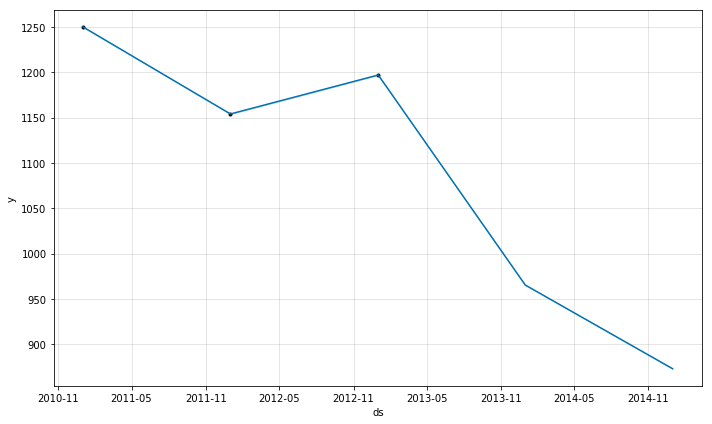

In [62]:
plt.figure()
fig1 = m.plot(forecast)

<Figure size 432x288 with 0 Axes>

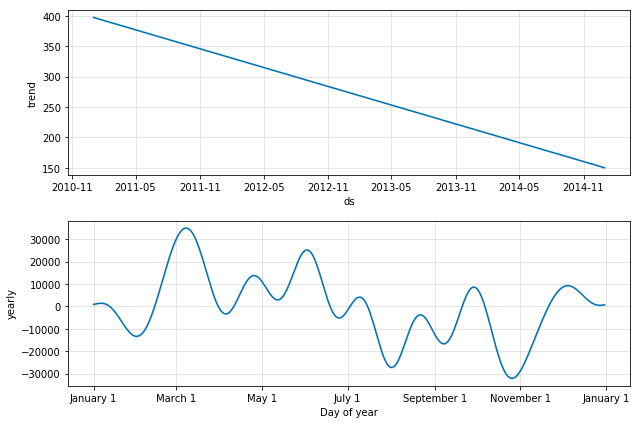

In [63]:
plt.figure()
fig2 = m.plot_components(forecast)